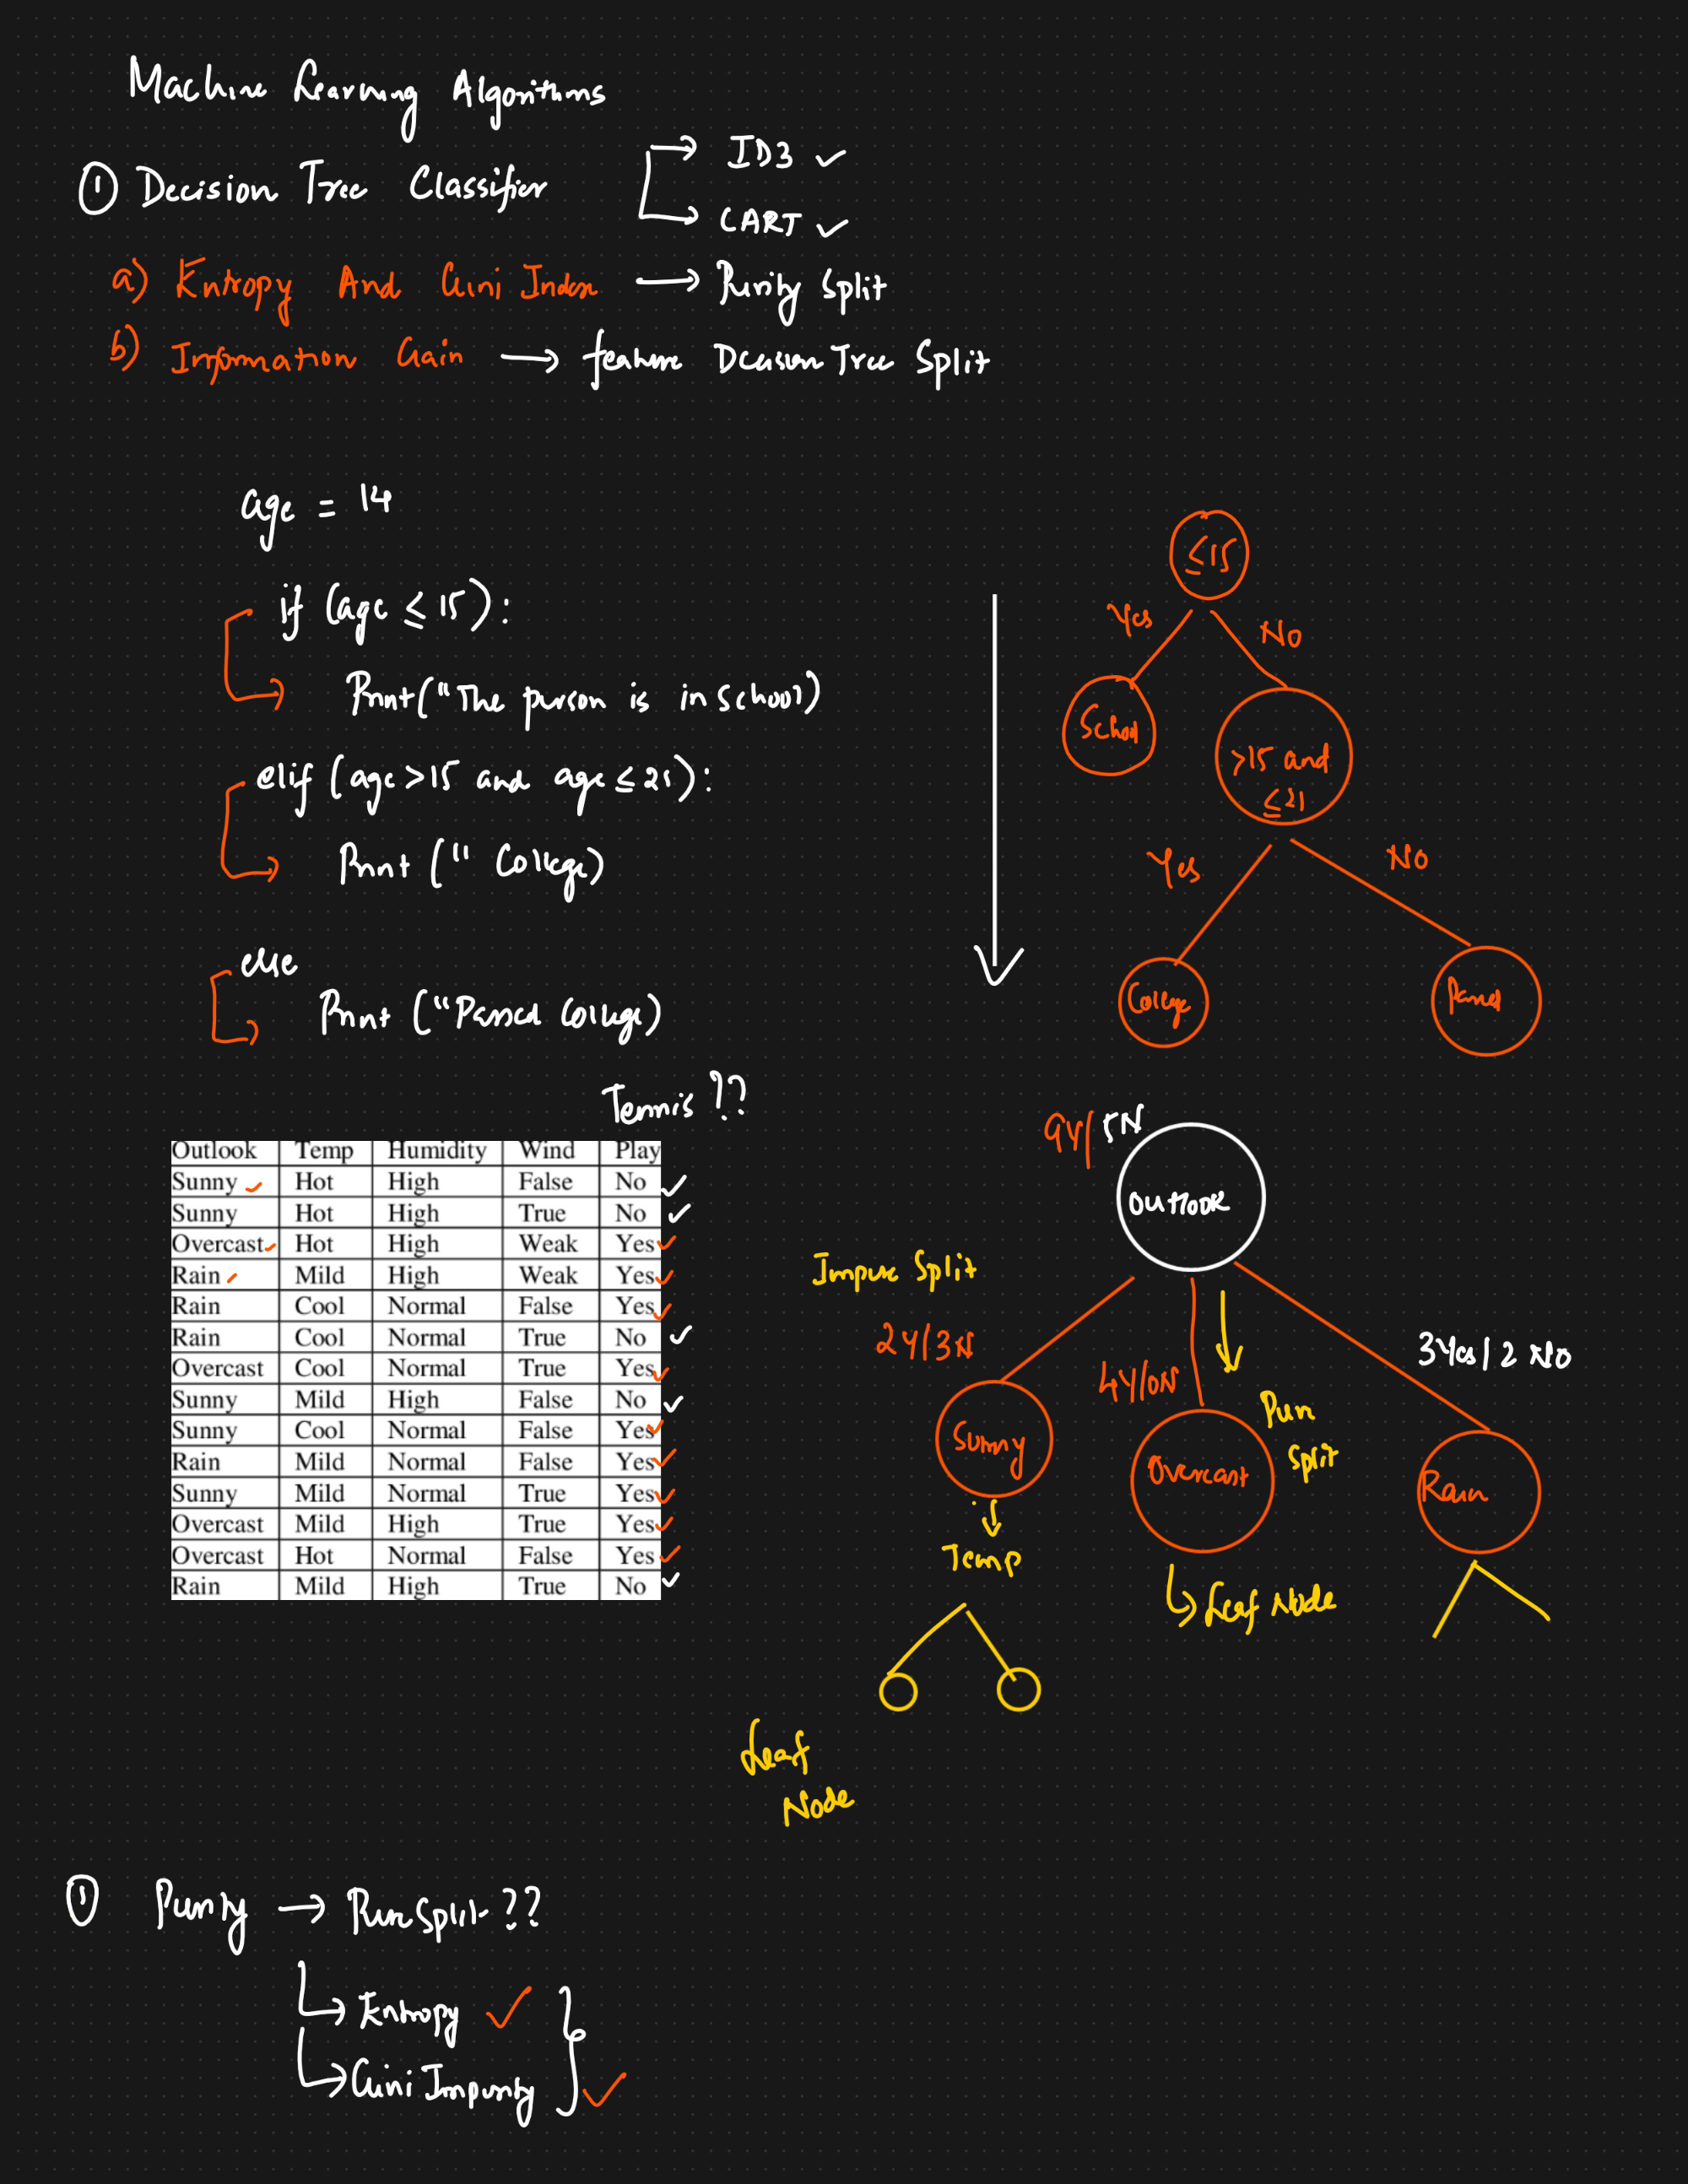

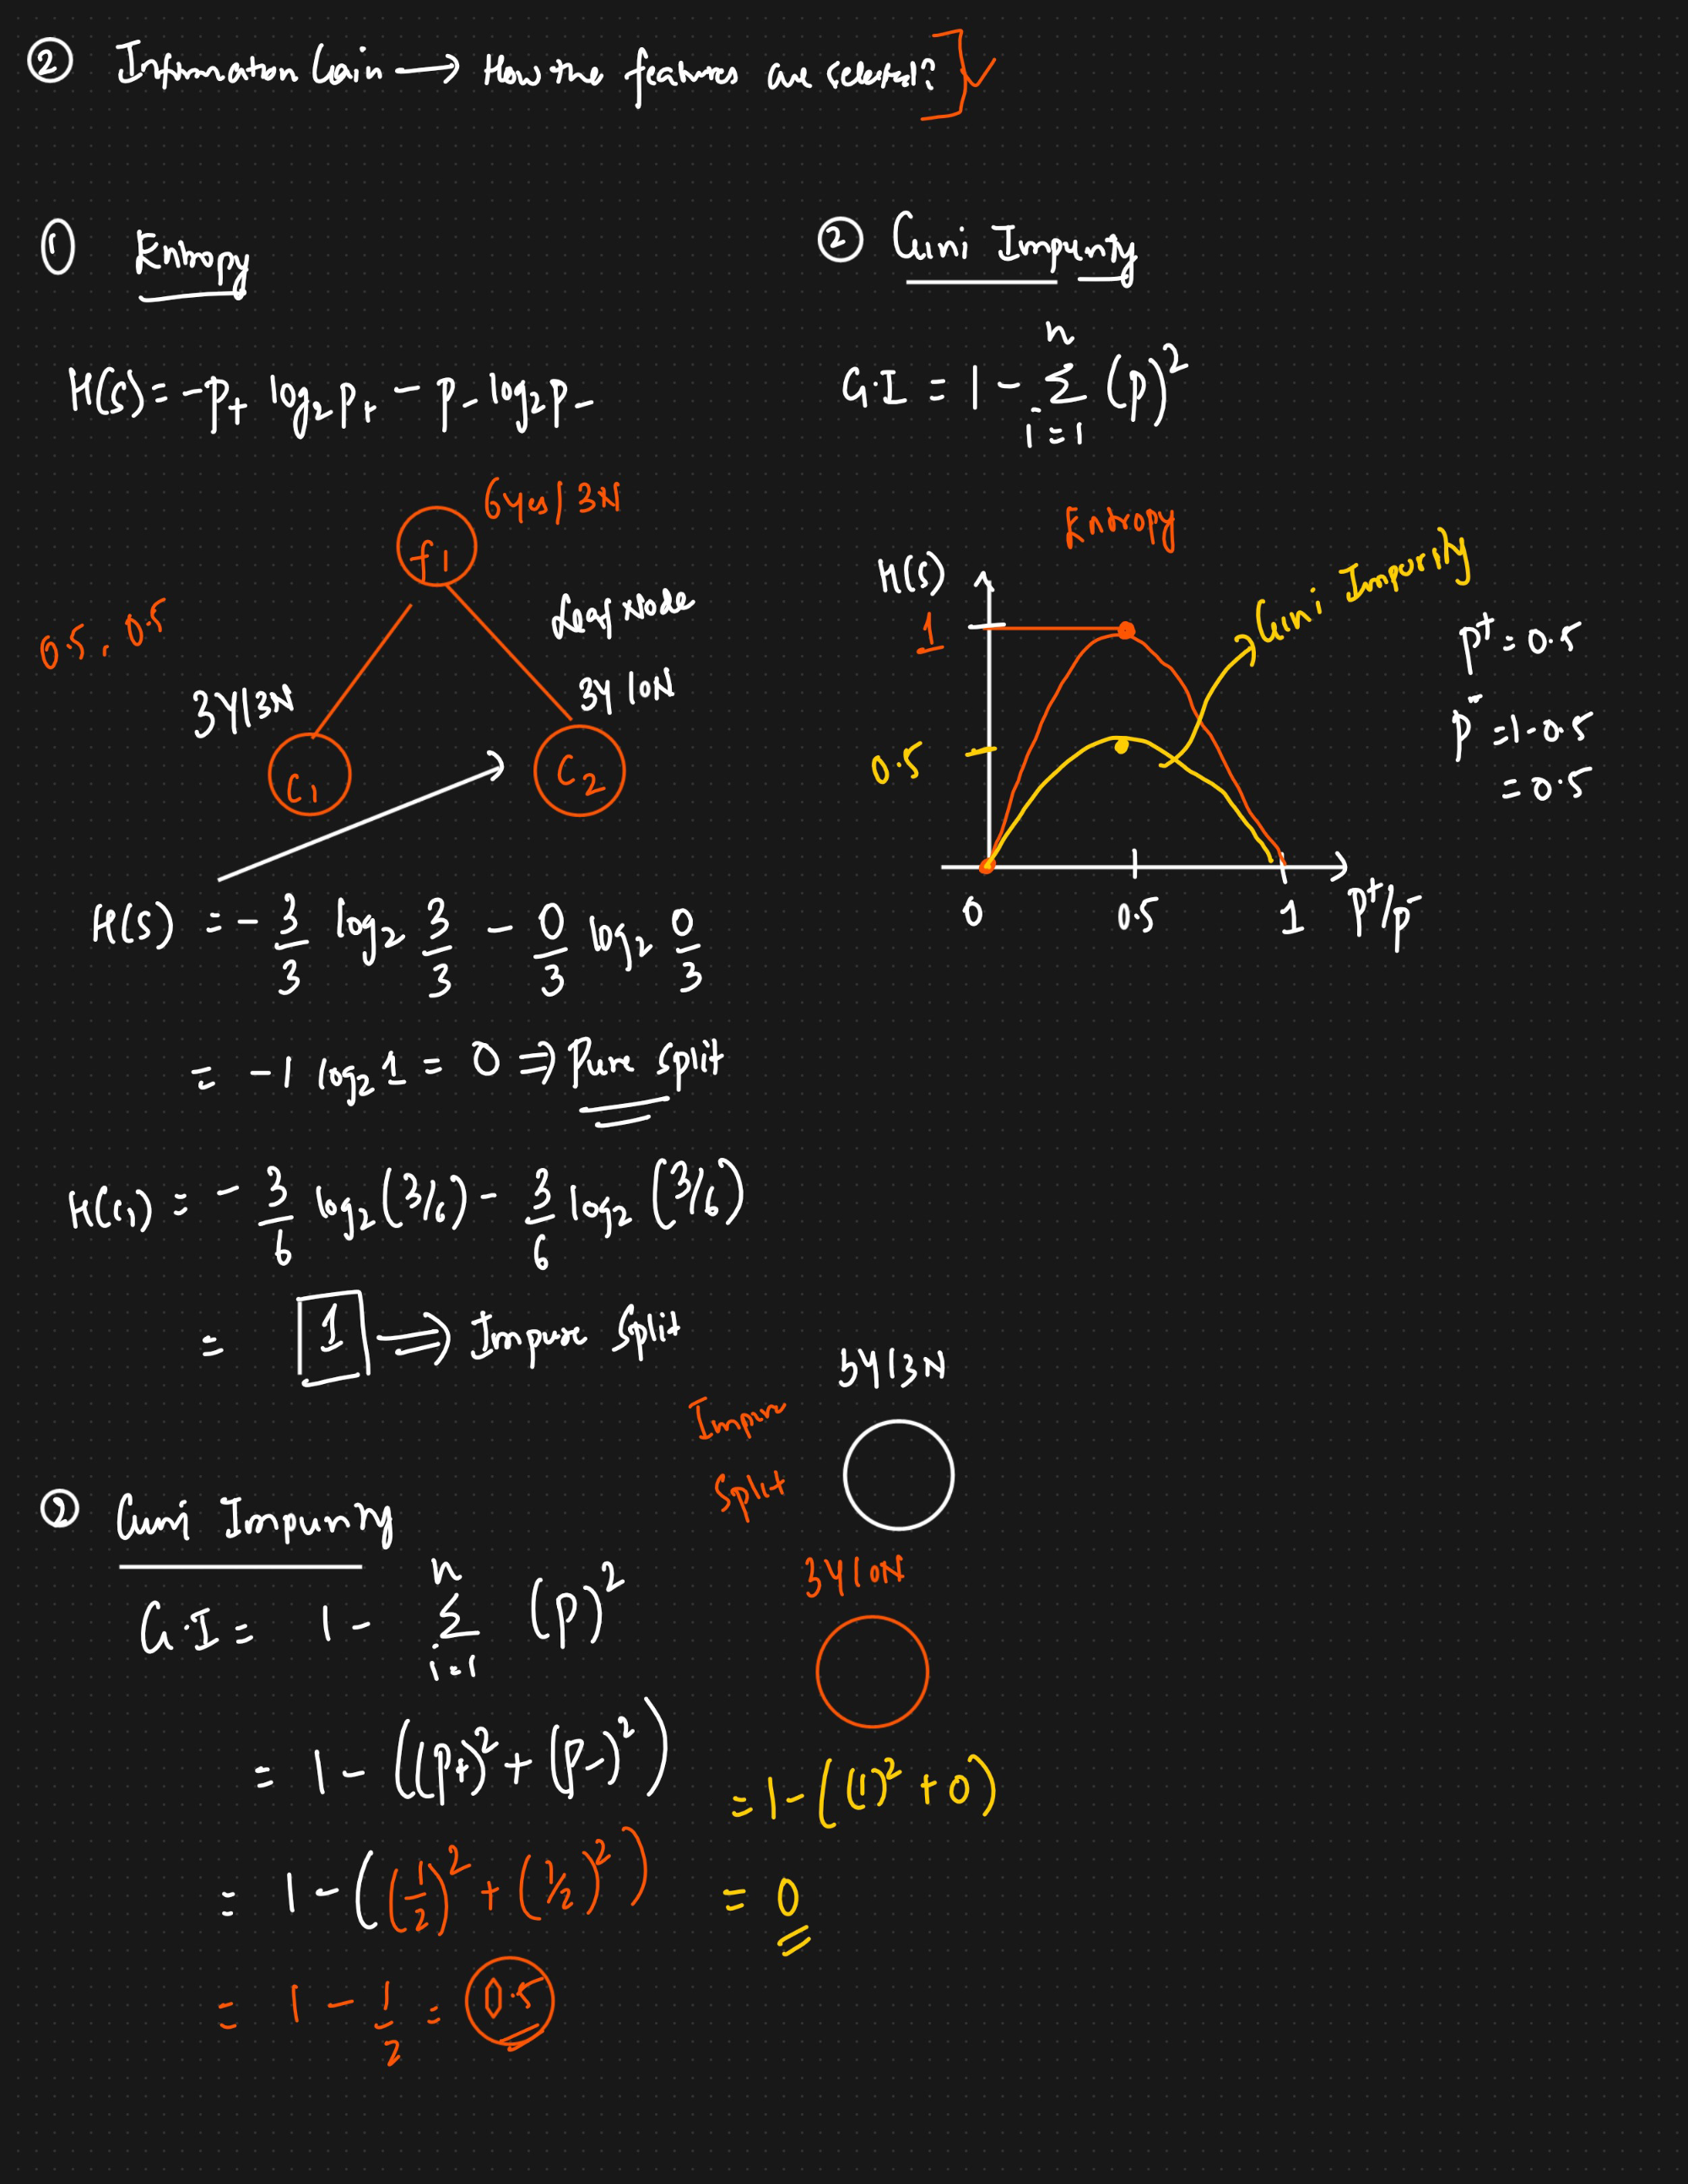

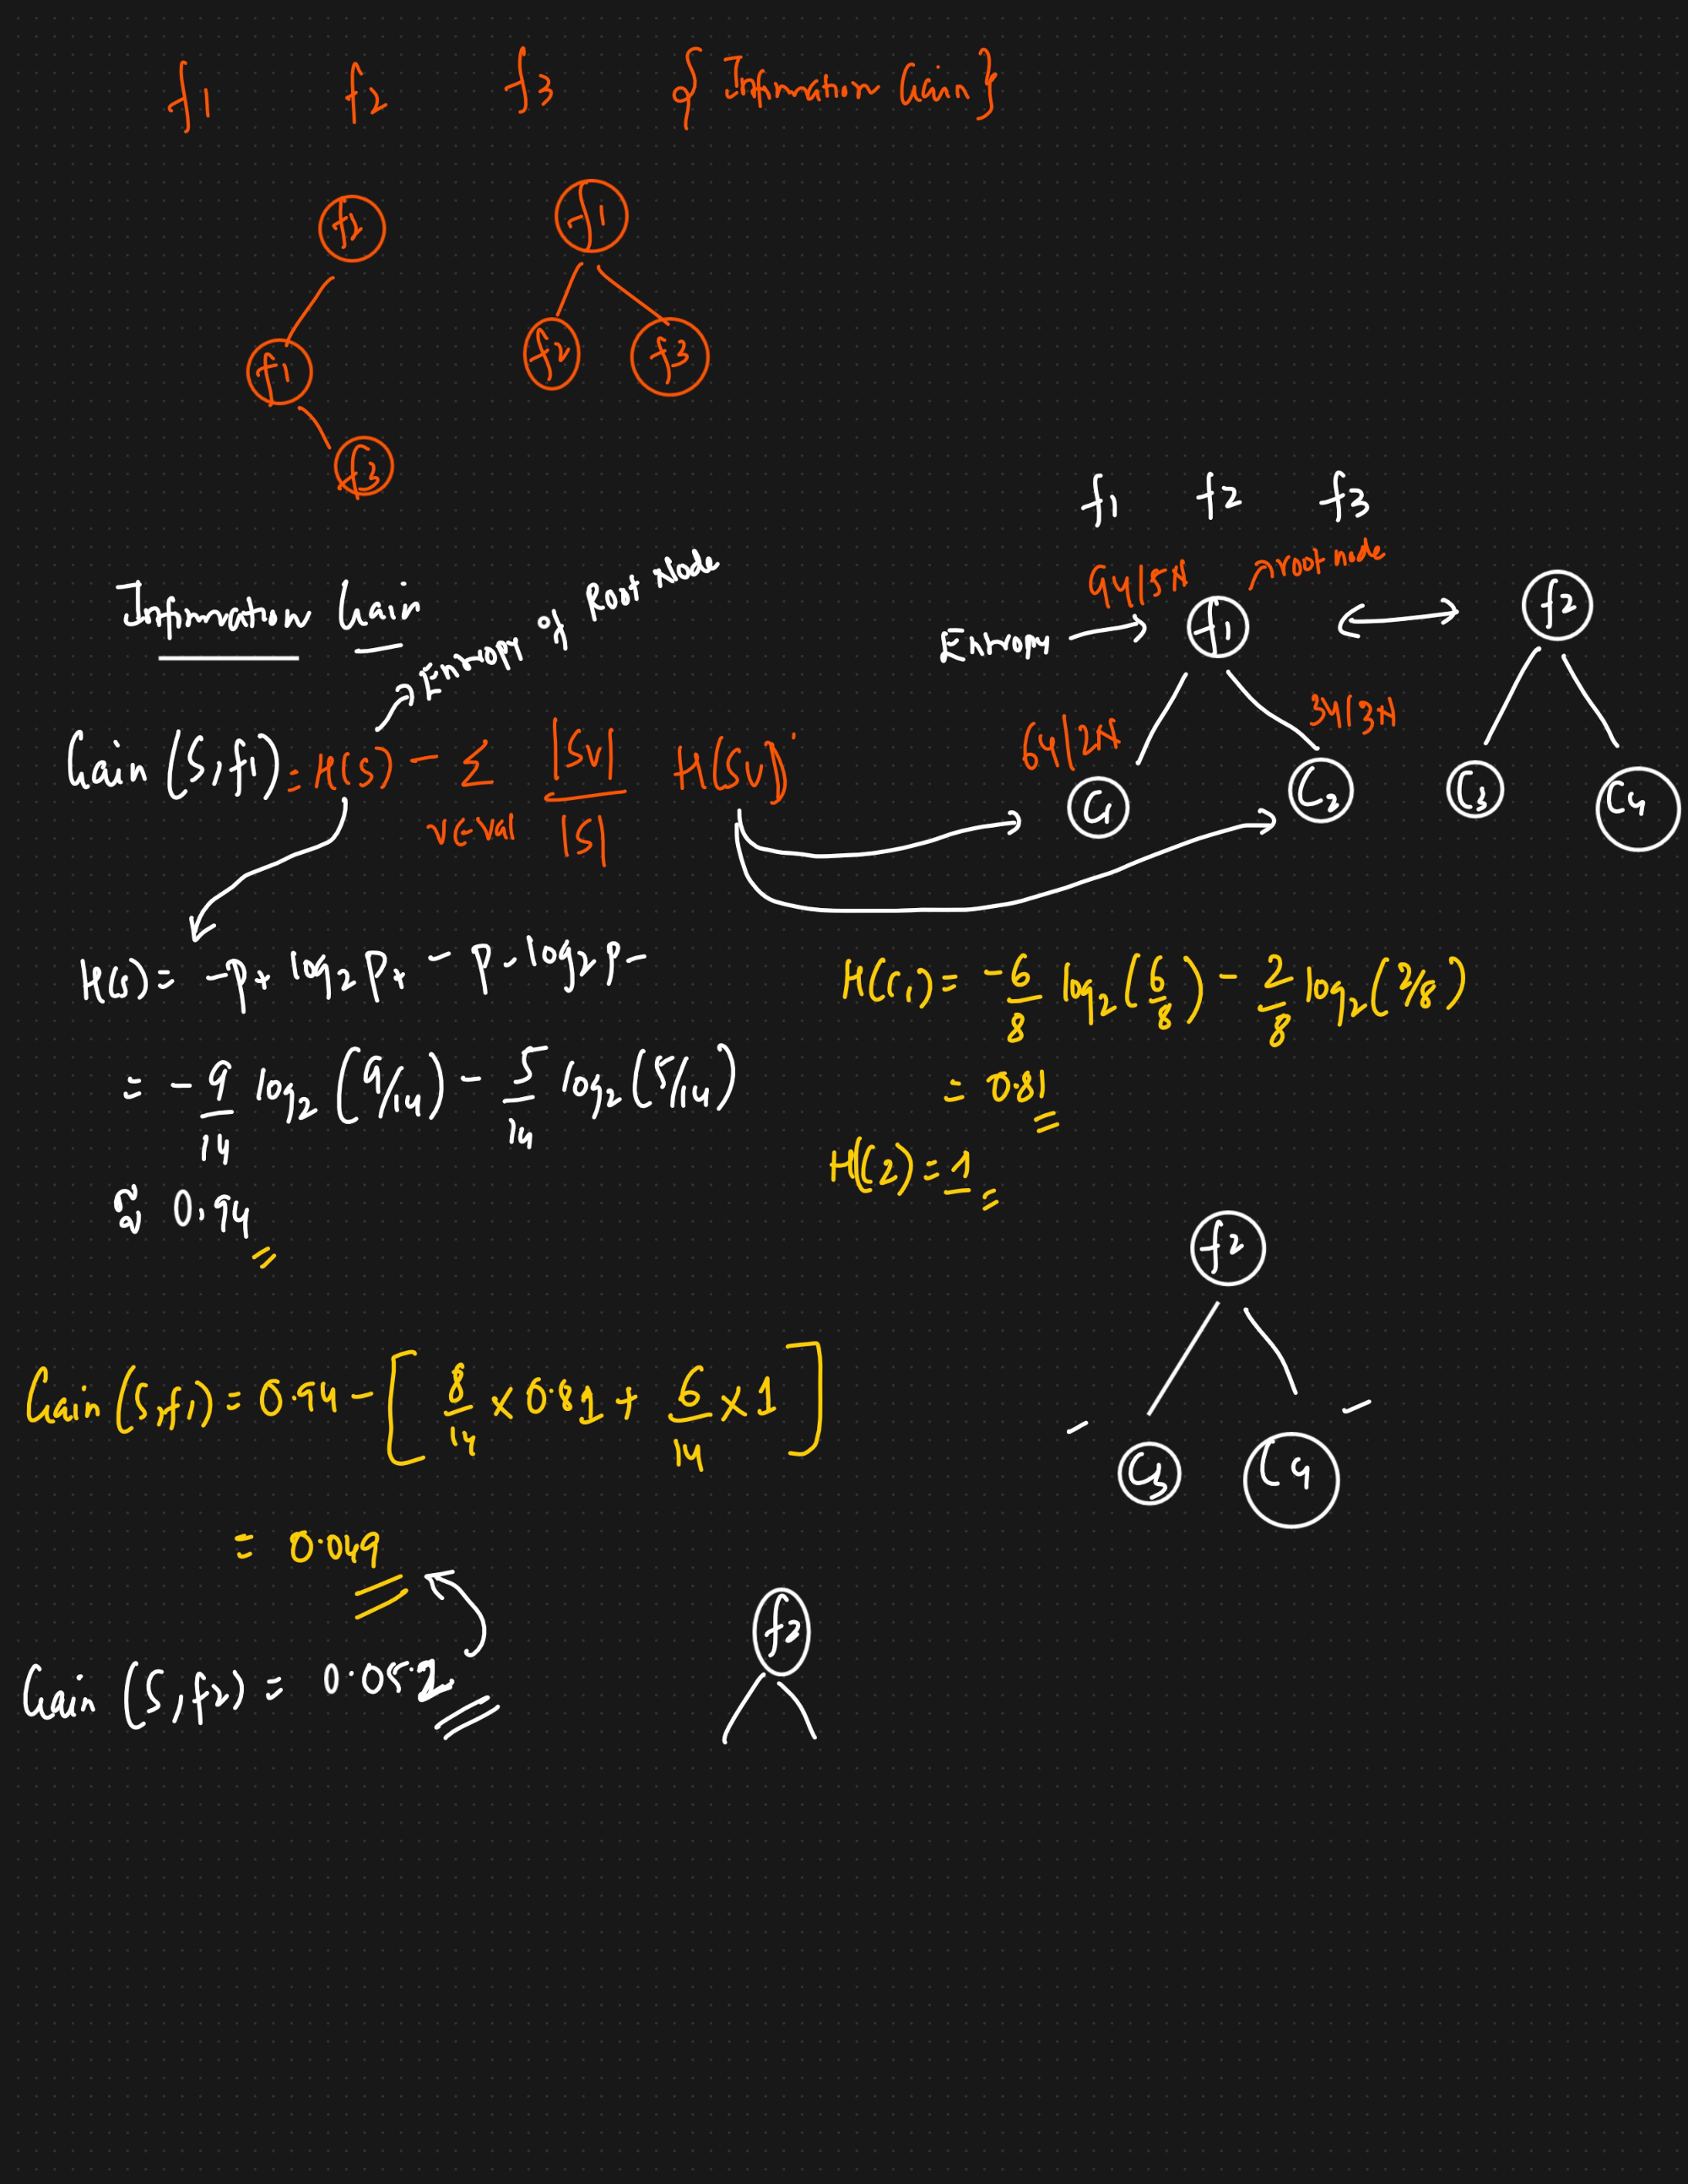

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
data=pd.read_csv("PreprocessedBank.csv")

In [4]:
data.head()

Unnamed: 0  age  default  balance  housing  loan  day  duration  campaign  \
0           0   59        1     2343        0     1    5      1042         1   
1           1   56        1       45        1     1    5      1467         1   
2           2   41        1     1270        0     1    5      1389         1   
3           3   55        1     2476        0     1    5       579         1   
4           4   54        1      184        1     1    5       673         2   

   pdays  ...  jun  mar  may  nov  oct  sep  failure  success  unknown  \
0     -1  ...    0    0    1    0    0    0        0        0        1   
1     -1  ...    0    0    1    0    0    0        0        0        1   
2     -1  ...    0    0    1    0    0    0        0        0        1   
3     -1  ...    0    0    1    0    0    0        0        0        1   
4     -1  ...    0    0    1    0    0    0        0        0        1   

   deposit  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 44 columns]

In [7]:
X=data.drop("deposit",axis=1)
X

Unnamed: 0  age  default  balance  housing  loan  day  duration  \
0               0   59        1     2343        0     1    5      1042   
1               1   56        1       45        1     1    5      1467   
2               2   41        1     1270        0     1    5      1389   
3               3   55        1     2476        0     1    5       579   
4               4   54        1      184        1     1    5       673   
...           ...  ...      ...      ...      ...   ...  ...       ...   
11157       11157   33        1        1        0     1   20       257   
11158       11158   39        1      733        1     1   16        83   
11159       11159   32        1       29        1     1   19       156   
11160       11160   43        1        0        1     0    8         9   
11161       11161   34        1        0        1     1    9       628   

       campaign  pdays  ...  jul  jun  mar  may  nov  oct  sep  failure  \
0             1     -1  ...    0    0    0    1    0    0    0        0   
1             1     -1  ...    0    0    0    1    0    0    0        0   
2             1     -1  ...    0    0    0    1    0    0    0        0   
3             1     -1  ...    0    0    0    1    0    0    0        0   
4             2     -1  ...    0    0    0    1    0    0    0        0   
...         ...    ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
11157         1     -1  ...    0    0    0    0    0    0    0        0   
11158         4     -1  ...    0    1    0    0    0    0    0        0   
11159         2     -1  ...    0    0    0    0    0    0    0        0   
11160         2    172  ...    0    0    0    1    0    0    0        1   
11161         1     -1  ...    1    0    0    0    0    0    0        0   

       success  unknown  
0            0        1  
1            0        1  
2            0        1  
3            0        1  
4            0        1  
...        ...      ...  
11157        0        1  
11158        0        1  
11159        0        1  
11160        0        0  
11161        0        1  

[11162 rows x 43 columns]

In [8]:
y=data.deposit
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [9]:
import seaborn as sns

In [10]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [11]:
X_train

Unnamed: 0  age  default  balance  housing  loan  day  duration  \
337          337   52        1     2269        1     1   20      1210   
6221        6221   40        1       34        0     1    6       350   
4345        4345   35        1     1731        1     1   31       361   
2650        2650   31        1      924        1     1    7       231   
5156        5156   35        1     1015        0     1    5       406   
...          ...  ...      ...      ...      ...   ...  ...       ...   
5734        5734   47        1      761        0     1   11        80   
5191        5191   28        1      159        1     1   16       449   
5390        5390   35        1     1144        1     1   20       197   
860          860   51        1      746        1     1   25       372   
7270        7270   30        1        2        1     1   23       269   

      campaign  pdays  ...  jul  jun  mar  may  nov  oct  sep  failure  \
337          1     -1  ...    0    1    0    0    0    0    0        0   
6221         2    344  ...    0    0    0    1    0    0    0        1   
4345         4     -1  ...    1    0    0    0    0    0    0        0   
2650         1     94  ...    0    0    0    0    0    0    1        0   
5156         2     -1  ...    0    1    0    0    0    0    0        0   
...        ...    ...  ...  ...  ...  ...  ...  ...  ...  ...      ...   
5734         2     -1  ...    1    0    0    0    0    0    0        0   
5191         2     33  ...    0    0    0    0    1    0    0        0   
5390        13     -1  ...    0    0    0    0    0    0    0        0   
860          5     -1  ...    0    0    0    0    0    0    0        0   
7270         1     -1  ...    0    0    1    0    0    0    0        0   

      success  unknown  
337         0        1  
6221        0        0  
4345        0        1  
2650        1        0  
5156        0        1  
...       ...      ...  
5734        0        1  
5191        1        0  
5390        0        1  
860         0        1  
7270        0        1  

[7478 rows x 43 columns]

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
## Postpruning
treemodel=DecisionTreeClassifier(max_depth=2)

In [27]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.75, 'x[0] <= 5289.0\ngini = 0.498\nsamples = 7478\nvalue = [3956, 3522]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3522\nvalue = [0, 3522]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3956\nvalue = [3956, 0]')]

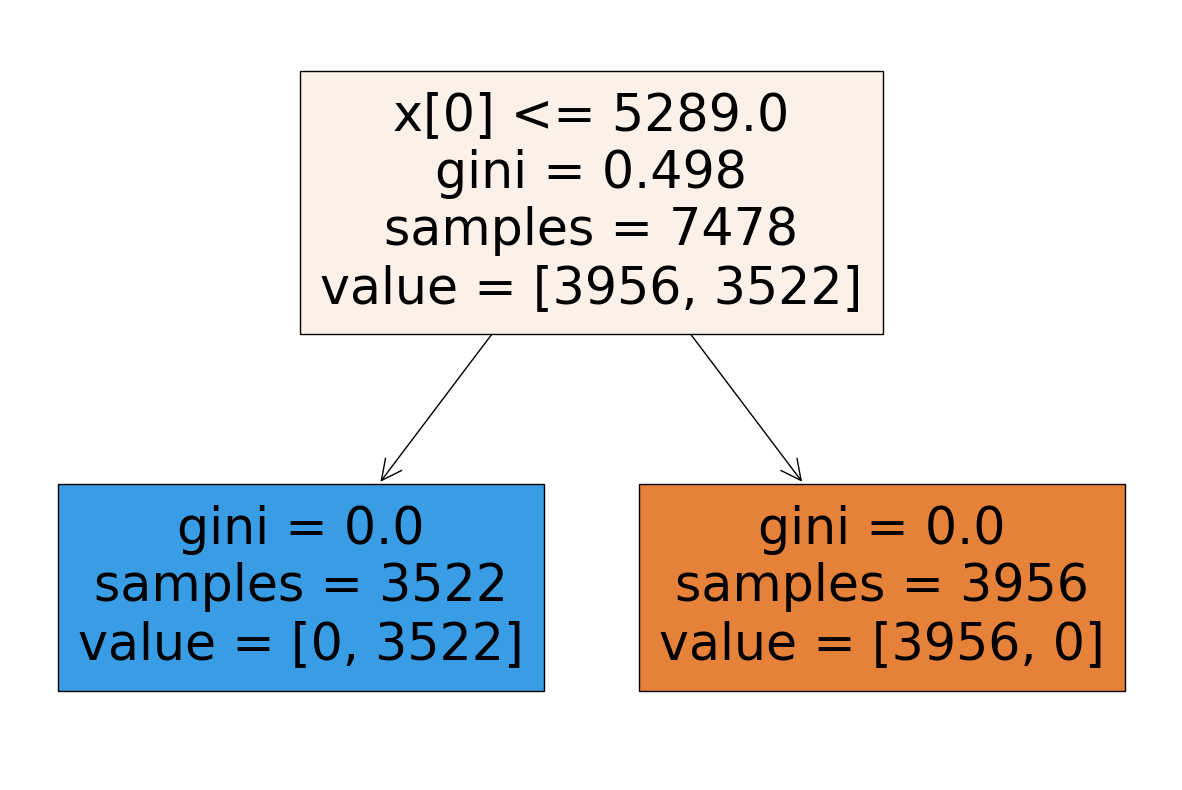

In [28]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [16]:
#prediction
y_pred=treemodel.predict(X_test)

In [17]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
score=accuracy_score(y_pred,y_test)
print(score)

0.999728555917481


In [20]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1916
           1       1.00      1.00      1.00      1768

    accuracy                           1.00      3684
   macro avg       1.00      1.00      1.00      3684
weighted avg       1.00      1.00      1.00      3684

